In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
def funct(a, b, x):
    return (np.dot(x, a) + b)

def add_noise(x, sigma):
    return np.random.normal(x, scale = sigma)

# y = a * x + b, standard deviation of noise, number of training samples
a, b, sigma = np.random.randint(1, 4), np.random.randint(0, 3), 0.2
min_x, max_x,  = 0, 1
q_samples, q_steps_interval = 50, 100

In [12]:
# true value, training and test sets (assuming noise affects the measurements)
x_interval = np.linspace(min_x, max_x, q_steps_interval).reshape(-1, 1)
y_real = funct(a, b, x_interval)

X_train = min_x + (max_x - min_x) * np.random.rand(q_samples, 1)
y_train = add_noise(funct(a, b, X_train), sigma).reshape(-1, 1)

X_test = x_interval
y_test = add_noise(y_real, sigma).reshape(-1, 1)

In [13]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))
print('a_real = {} --> a_estimated = {}'.format(a, clf.coef_[0][0]))
print('b_real = {} --> b_estimated = {}'.format(b, clf.intercept_[0]))

RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 2.0589639536836826
b_real = 1 --> b_estimated = 0.9553244912391825


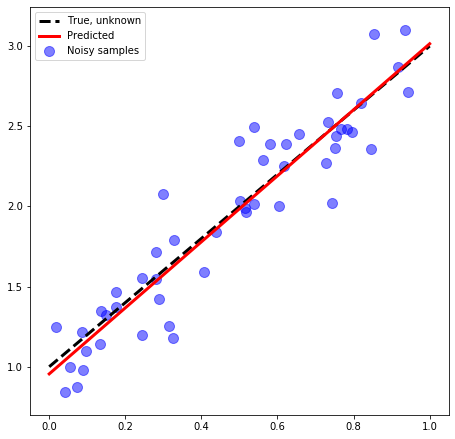

In [14]:
plt.figure(figsize=(7.5, 7.5))
plt.plot(x_interval, y_real, 'k--', linewidth = 3,  label = 'True, unknown')
plt.scatter(X_train, y_train, color = 'b', label = 'Noisy samples', s = 100, alpha = 0.5)
plt.plot(X_test, y_pred, 'r', linewidth = 3,  label = 'Predicted')
plt.legend()

RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 1.9592541835480972
b_real = 1 --> b_estimated = 1.0196980726962765
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 2.1355798463018565
b_real = 1 --> b_estimated = 0.9243690992171794
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 1.9426691933657492
b_real = 1 --> b_estimated = 1.0083411877659942
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 2.0334523012980443
b_real = 1 --> b_estimated = 0.94255934819815
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 1.9798961947348852
b_real = 1 --> b_estimated = 0.9895614667395564
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 1.931514517316649
b_real = 1 --> b_estimated = 1.0430580833949863
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 2.1010911276463644
b_real = 1 --> b_estimated = 0.9893789467382843
RMSE = 0.20841304448916473
a_real = 2 --> a_estimated = 1.9875086466142076
b_real = 1 --> b_estimated = 1.0083343468475963
RMSE = 0.2084130444

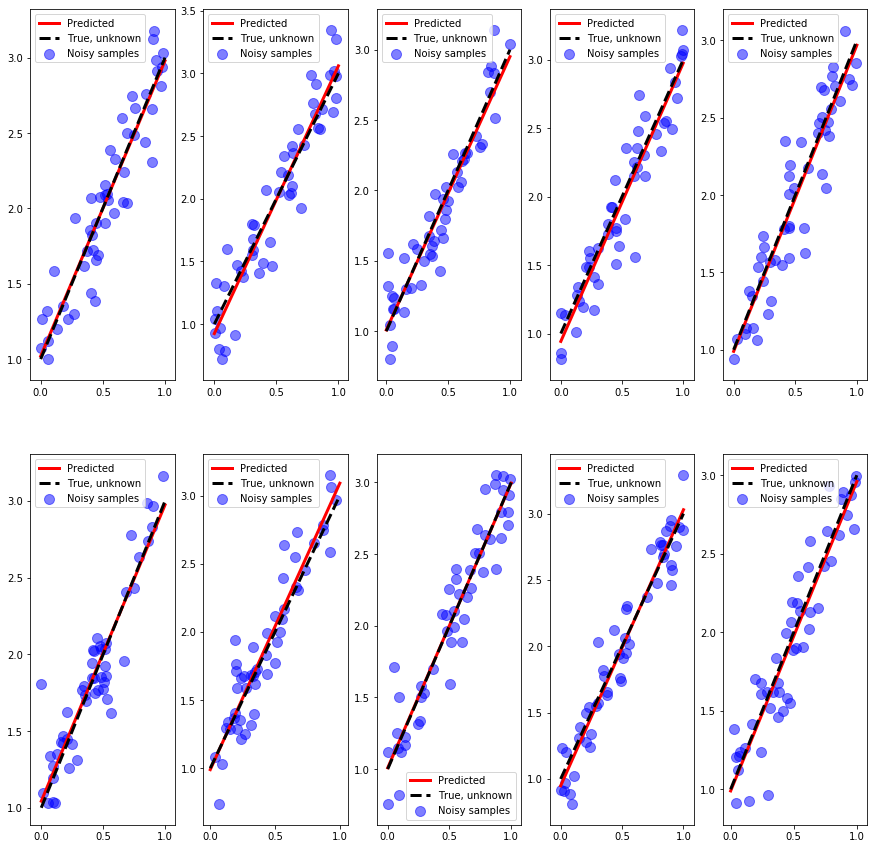

In [15]:
f, ax = plt.subplots(2, 5, figsize=(15, 15))
ax = ax.ravel()
results = []
for i in range(10):
    X_train = min_x + (max_x - min_x) * np.random.rand(q_samples, 1)
    y_train = add_noise(funct(a, b, X_train), sigma).reshape(-1, 1)
    clf.fit(X_train, y_train)
    results.append(clf.predict(X_test))
    ax[i].plot(X_test, results[i], 'r', linewidth = 3, label = 'Predicted')
    ax[i].plot(x_interval, y_real, 'k--', linewidth = 3,  label = 'True, unknown')
    ax[i].scatter(X_train, y_train, color = 'b', label = 'Noisy samples', s = 100, alpha = 0.5)
    ax[i].legend()   
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))
    print('a_real = {} --> a_estimated = {}'.format(a, clf.coef_[0][0]))
    print('b_real = {} --> b_estimated = {}'.format(b, clf.intercept_[0]))

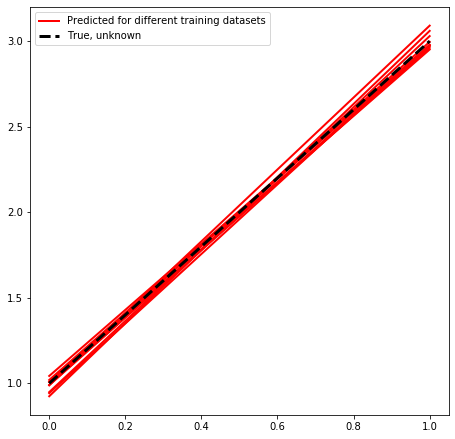

In [16]:
plt.figure(figsize=(7.5, 7.5))
for r in results:
    plt.plot(X_test, r, 'r', linewidth = 2, label = 'Predicted for different training datasets')
plt.plot(x_interval, y_real, 'k--', linewidth = 3,  label = 'True, unknown')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())